# Saving and Loading Models

# Save the model

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

np.random.seed(101)
tf.set_random_seed(101)
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
plt.plot(x_data,y_label,'*')

m = tf.Variable(0.39)
b = tf.Variable(0.2)

error = tf.reduce_mean(y_label - (m*x_data+b))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
saver = tf.train.Saver()

with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])
    
    # ONCE YOU ARE DONE
    # GO AHEAD AND SAVE IT!
    # Make sure to provide a directory for it to make or go to. May get errors otherwise
    #saver.save(sess,'models/my_first_model.ckpt')
    saver.save(sess,'new_models/my_second_model.ckpt')

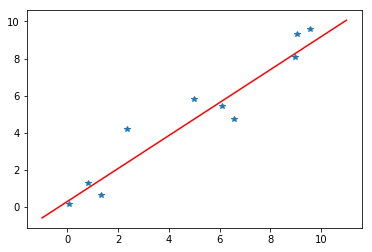

In [3]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

# Loading a Model

In [4]:
with tf.Session() as sess:
    
    # Restore the model
    saver.restore(sess,'new_models/my_second_model.ckpt')
    

    # Fetch Back Results
    restored_slope , restored_intercept = sess.run([m,b])

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from new_models/my_second_model.ckpt


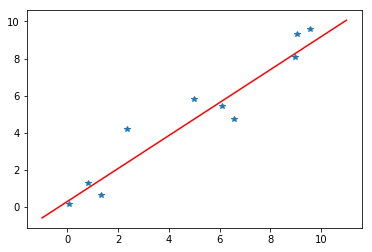

In [5]:
x_test = np.linspace(-1,11,10)
y_pred_plot = restored_slope*x_test + restored_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')